In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [5]:
banana = titles.groupby(['title']).size()
banana.sort_values(ascending = False)[0:10]

title
Hamlet                  19
Macbeth                 15
Carmen                  15
The Outsider            11
Maya                    11
The Three Musketeers    11
Hero                    11
Othello                 11
Freedom                 10
Temptation              10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [6]:
titles['decade'] = titles.year // 10 * 10
cast['decade'] = cast.year // 10 *10

In [7]:
banana = titles[(titles.decade == 1930)]
banana = banana.groupby(['year']).size()
banana.sort_values(ascending = False)[0:3]
#banana.sort_values(ascending = False)[0:10]

year
1937    1190
1936    1133
1938    1127
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [8]:
banana = titles.groupby(['decade']).size()
banana.sort_values(ascending = False)

decade
2010    66965
2000    38467
1990    22058
1980    20060
1970    18489
1960    17347
1950    12602
1930    10043
1920     8750
1940     8472
1910     6452
2020      139
1900       36
1890        2
dtype: int64

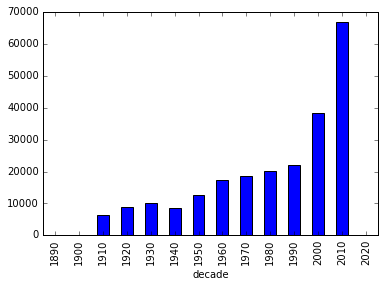

In [9]:
banana.plot(kind = 'bar')

### Plot the number of "Hamlet" films made each decade.

In [10]:
banana = titles[(titles.title == 'Hamlet')]
banana = banana.groupby(['decade']).size()
banana.sort_values(ascending = False)

decade
2010    4
1910    3
2000    2
1990    2
1970    2
1960    2
1980    1
1950    1
1940    1
1920    1
dtype: int64

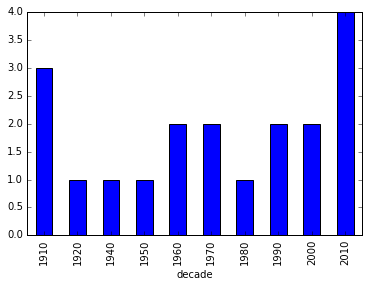

In [11]:
banana.plot(kind = 'bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

In [12]:
banana = cast[(cast.character == 'Rustler')]
banana = banana.groupby(['decade']).size()
banana.sort_values(ascending = False)

decade
1930    84
1940    18
1970     9
1950     8
1920     6
1990     4
2000     2
1960     2
1980     1
dtype: int64

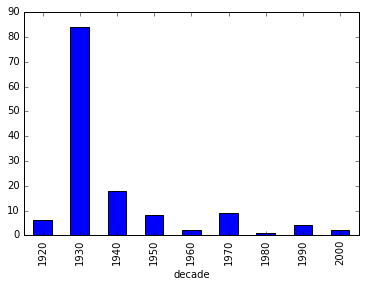

In [13]:
banana.plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

In [14]:
banana = cast[(cast.title == 'Hamlet')]
banana = banana.groupby(['decade']).size()
banana.sort_values(ascending = False)

decade
1990    83
1960    57
2000    55
2010    34
1910    28
1940    24
1970    19
1920     9
1980     3
1950     1
dtype: int64

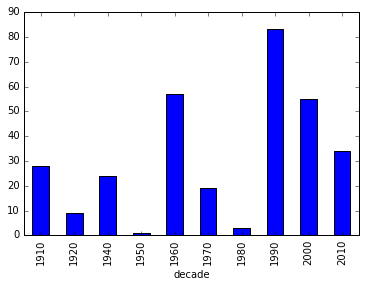

In [15]:
banana.plot(kind = 'bar')

### What are the 11 most common character names in movie history?

In [16]:
banana = cast.groupby(['character']).size()
banana.sort_values(ascending = False)[0:11]

character
Himself        19362
Dancer         11850
Extra          10690
Reporter        8046
Doctor          7321
Student         6929
Policeman       6801
Party Guest     6644
Nurse           6529
Bartender       6501
Minor Role      6172
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [17]:
banana = cast[(cast.character == 'Herself')]
banana = banana.groupby(['name']).size()
banana.sort_values(ascending = False)[0:10]

name
Joyce Brothers        14
Queen Elizabeth II    11
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Rekha                  5
Kareena Kapoor         5
Hillary Clinton        5
Caroline Rhea          5
Bunny Yeager           5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [18]:
banana = cast[(cast.character == 'Himself')]
banana = banana.groupby(['name']).size()
banana.sort_values(ascending = False)[0:10]

name
Adolf Hitler             98
Richard Nixon            44
Ronald Reagan            36
John F. Kennedy          29
Ron Jeremy               22
George W. Bush           22
Benito Mussolini         22
Winston Churchill        22
Bill Clinton             20
Franklin D. Roosevelt    20
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [19]:
banana = cast[(cast.year == 1945)]
banana = banana.groupby(['name']).size()
banana.sort_values(ascending = False)[0:10]

name
Emmett Vogan       39
Sam (II) Harris    32
Bess Flowers       29
Harold Miller      29
Nolan Leary        27
Frank O'Connor     27
Larry Steers       25
Franklyn Farnum    25
Pierre Watkin      24
Herman Hack        24
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [20]:
banana = cast[(cast.year == 1985)]
banana = banana.groupby(['name']).size()
banana.sort_values(ascending = False)[0:10]

name
Mammootty        21
Shakti Kapoor    20
Sukumari         19
Lou Scheimer     15
Aruna Irani      15
Raj Babbar       15
Mohanlal         15
Rajesh Khanna    13
Deven Verma      13
Om Shivpuri      12
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

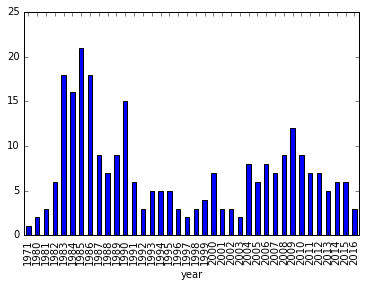

In [21]:
banana = cast[(cast.name == 'Mammootty')]
banana = banana.groupby(['year']).size()
banana.plot(kind = 'bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [22]:
banana = cast[(cast.character.str.startswith('Patron in'))]
banana = banana.groupby(['character']).size()
banana.sort_values(ascending = False)[0:10]

character
Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in restaurant             3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Quiet Bar              2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [23]:
banana = cast[(cast.character.str.startswith('Science'))]
banana = banana.groupby(['character']).size()
banana.sort_values(ascending = False)[0:10]

character
Science Teacher         57
Science Fair Student     9
Science Student          9
Science Club Member      5
Science Fair Judge       5
Science Kid              5
Science Promo Cadet      5
Science Reporter         5
Science teacher          3
Science Fair Kid         3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

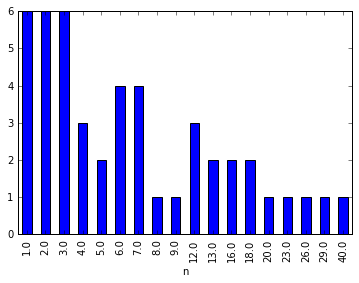

In [24]:
banana = cast[(cast.name == 'Judi Dench')]
banana = banana.groupby(['n']).size()
banana.plot(kind = 'bar')

### Plot the n-values of Cary Grant's roles through his career.

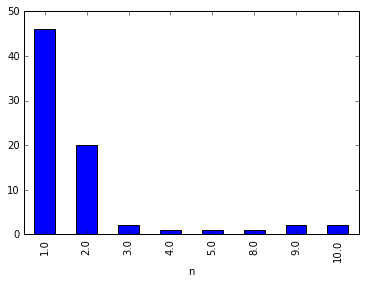

In [25]:
banana = cast[(cast.name == 'Cary Grant')]
banana = banana.groupby(['n']).size()
banana.plot(kind = 'bar')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

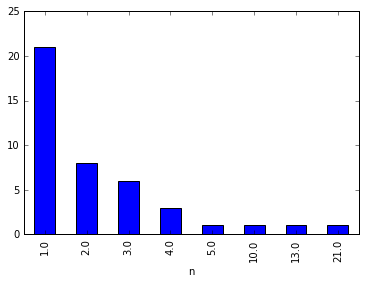

In [26]:
banana = cast[(cast.name == 'Sidney Poitier')]
banana = banana.groupby(['n']).size()
banana.plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [27]:
banana = cast[(cast.type == 'actor') & (cast.n == 1) & (cast.decade == 1950)]
banana = banana.groupby(['decade']).size()
banana

decade
1950    6563
dtype: int64

In [28]:
banana = cast[(cast.type == 'actress') & (cast.n == 1) & (cast.decade == 1950)]
banana = banana.groupby(['decade']).size()
banana

decade
1950    2940
dtype: int64

In [29]:
# 6563 actors and 2940 actresses.

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [30]:
banana = cast[(cast.type == 'actor') & (cast.n == 2) & (cast.decade == 1950)]
banana = banana.groupby(['decade']).size()
banana

decade
1950    4530
dtype: int64

In [31]:
banana = cast[(cast.type == 'actress') & (cast.n == 2) & (cast.decade == 1950)]
banana = banana.groupby(['decade']).size()
banana

decade
1950    4519
dtype: int64

In [32]:
# 4530 actors and 4519 actresses.